In [1]:
##### pandas_datareader :- 
##The Pandas datareader is a sub package that allows one to create a dataframe from various internet datasources, 
##currently including: Yahoo! Finance. Google Finance. ... Google Analytics.
import pandas_datareader as pdr

In [2]:
### Get API key from Tiingo --> https://api.tiingo.com/
### Do Sign up and you will get API key in Account section.
key='********'


In [3]:
### Reading Apple stock price data
df=pdr.get_data_tiingo('AAPL',api_key=key)

In [4]:
df.head()

close    high  ...  divCash  splitFactor
symbol date                                       ...                      
AAPL   2015-12-07 00:00:00+00:00  118.28  119.86  ...      0.0          1.0
       2015-12-08 00:00:00+00:00  118.23  118.60  ...      0.0          1.0
       2015-12-09 00:00:00+00:00  115.62  117.69  ...      0.0          1.0
       2015-12-10 00:00:00+00:00  116.17  116.94  ...      0.0          1.0
       2015-12-11 00:00:00+00:00  113.18  115.39  ...      0.0          1.0

[5 rows x 12 columns]

In [5]:
df.tail()

close      high  ...  divCash  splitFactor
symbol date                                         ...                      
AAPL   2020-11-25 00:00:00+00:00  116.03  116.7500  ...      0.0          1.0
       2020-11-27 00:00:00+00:00  116.59  117.4900  ...      0.0          1.0
       2020-11-30 00:00:00+00:00  119.05  120.9700  ...      0.0          1.0
       2020-12-01 00:00:00+00:00  122.72  123.4693  ...      0.0          1.0
       2020-12-02 00:00:00+00:00  123.08  123.3700  ...      0.0          1.0

[5 rows x 12 columns]

In [6]:
### file save as csv
df.to_csv('AAPL.csv')

In [7]:
import pandas as pd


In [8]:
df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-12-07 00:00:00+00:00,118.28,119.86,117.810,118.98,32084249,27.392297,27.758207,27.283451,27.554409,128336996,0.0,1.0
1,AAPL,2015-12-08 00:00:00+00:00,118.23,118.60,116.860,117.52,34309450,27.380718,27.466406,27.063442,27.216290,137237800,0.0,1.0
2,AAPL,2015-12-09 00:00:00+00:00,115.62,117.69,115.080,117.64,46361357,26.776272,27.255660,26.651214,27.244081,185445428,0.0,1.0
3,AAPL,2015-12-10 00:00:00+00:00,116.17,116.94,115.510,116.04,29212727,26.903646,27.081969,26.750797,26.873539,116850908,0.0,1.0
4,AAPL,2015-12-11 00:00:00+00:00,113.18,115.39,112.851,115.19,46886161,26.211196,26.723006,26.135003,26.676689,187544644,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-11-25 00:00:00+00:00,116.03,116.7500,115.17,115.55,76499234,116.03,116.7500,115.17,115.55,76499234,0.0,1.0
1253,AAPL,2020-11-27 00:00:00+00:00,116.59,117.4900,116.22,116.57,46691331,116.59,117.4900,116.22,116.57,46691331,0.0,1.0
1254,AAPL,2020-11-30 00:00:00+00:00,119.05,120.9700,116.81,116.97,169410176,119.05,120.9700,116.81,116.97,169410176,0.0,1.0
1255,AAPL,2020-12-01 00:00:00+00:00,122.72,123.4693,120.01,121.01,125920963,122.72,123.4693,120.01,121.01,125920963,0.0,1.0
1256,AAPL,2020-12-02 00:00:00+00:00,123.08,123.3700,120.89,122.02,89004195,123.08,123.3700,120.89,122.02,89004195,0.0,1.0


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline



In [11]:
df1=df.reset_index()['close']

In [12]:
df1.head()

0    118.28
1    118.23
2    115.62
3    116.17
4    113.18
Name: close, dtype: float64

In [13]:
df1.tail()

1252    116.03
1253    116.59
1254    119.05
1255    122.72
1256    123.08
Name: close, dtype: float64

In [14]:
df1.shape

(1257,)

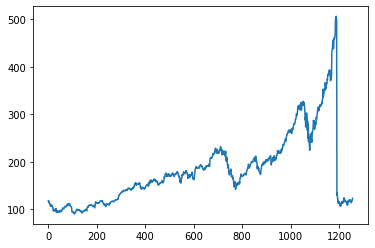

In [15]:
plt.plot(df1)

In [16]:
#### LSTM are sensitive to scale of data. So we apply MinMaxScaler

In [17]:
import numpy as np


((array([-3.2629588 , -3.00266919, -2.857728  , ...,  2.857728  ,
          3.00266919,  3.2629588 ]),
  array([ 90.34,  90.52,  92.04, ..., 500.04, 503.43, 506.09])),
 (71.32878595720456, 182.39793953699285, 0.9372860025733856))

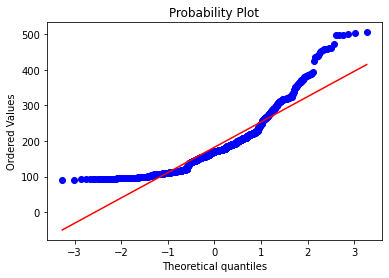

In [18]:
from scipy import stats
stats.probplot(df['close'],plot=plt)

In [19]:
df1

0       118.28
1       118.23
2       115.62
3       116.17
4       113.18
         ...  
1252    116.03
1253    116.59
1254    119.05
1255    122.72
1256    123.08
Name: close, Length: 1257, dtype: float64

In [20]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))

In [21]:
### Converted it in array
df1=scale.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
df1

array([[0.06720385],
       [0.06708358],
       [0.06080577],
       ...,
       [0.06905592],
       [0.07788334],
       [0.07874925]])

In [23]:
##### Splitting data in Training and Testing


#### In Time Series data 1row output is given to 2nd row as input. So thats why we split data 65% first data as training data
#    35% data for test data


training_size=int(len(df1)*0.65) ###giving 65% data to training_size
testing_size=len(df1)-training_size ###giving 35% data to testing_size

train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
training_size,testing_size

(817, 440)

In [25]:
train_data

array([[0.06720385],
       [0.06708358],
       [0.06080577],
       [0.06212868],
       [0.05493686],
       [0.05325316],
       [0.04846663],
       [0.05051112],
       [0.04483464],
       [0.03773903],
       [0.0408659 ],
       [0.04062538],
       [0.04394468],
       [0.04254961],
       [0.03963921],
       [0.04425737],
       [0.04084185],
       [0.03588695],
       [0.03610343],
       [0.02975346],
       [0.02491882],
       [0.01469633],
       [0.01592303],
       [0.01969934],
       [0.02313891],
       [0.01695731],
       [0.02208058],
       [0.01633193],
       [0.01520144],
       [0.01551413],
       [0.01433554],
       [0.02665063],
       [0.02188815],
       [0.02321106],
       [0.0074083 ],
       [0.00901984],
       [0.01683704],
       [0.01464823],
       [0.00995791],
       [0.0144558 ],
       [0.01505713],
       [0.00885147],
       [0.01123271],
       [0.01118461],
       [0.0094528 ],
       [0.00808178],
       [0.00877931],
       [0.015

In [26]:
test_data

array([[0.19860493],
       [0.21301263],
       [0.21784726],
       [0.2197715 ],
       [0.22463019],
       [0.23037883],
       [0.23494889],
       [0.231365  ],
       [0.23528563],
       [0.2519543 ],
       [0.24223692],
       [0.2366807 ],
       [0.23199038],
       [0.23603127],
       [0.23663259],
       [0.2395911 ],
       [0.24269393],
       [0.24938064],
       [0.25257968],
       [0.25339747],
       [0.25654841],
       [0.26400481],
       [0.26256164],
       [0.26525556],
       [0.26123873],
       [0.2610463 ],
       [0.26191221],
       [0.26196031],
       [0.27129284],
       [0.27304871],
       [0.27466025],
       [0.28175586],
       [0.28098617],
       [0.27646422],
       [0.27410704],
       [0.27485268],
       [0.26537583],
       [0.28906795],
       [0.2857727 ],
       [0.29202646],
       [0.28416115],
       [0.27064342],
       [0.27073963],
       [0.26549609],
       [0.25698136],
       [0.22941672],
       [0.23648827],
       [0.241

In [27]:
len(train_data)

817

In [28]:
len(test_data)

440

In [29]:
def create_dataset(dataset,timestep=1):
  data_x,data_y=[],[]
  for i in range(len(dataset)-timestep-1):
    a=dataset[i:(i+timestep),0]
    data_x.append(a)
    data_y.append(dataset[i+timestep,0])
  return np.array(data_x),np.array(data_y)


In [30]:
### Applying timestep=100
timestep=100
x_train,y_train=create_dataset(train_data,timestep)
x_test,y_test=create_dataset(test_data,timestep)

In [31]:
x_train.shape,y_train.shape

((716, 100), (716,))

In [32]:
x_test.shape,y_test.shape

((339, 100), (339,))

In [33]:
x_train

array([[0.06720385, 0.06708358, 0.06080577, ..., 0.01799158, 0.01079976,
        0.00817799],
       [0.06708358, 0.06080577, 0.06212868, ..., 0.01079976, 0.00817799,
        0.00793746],
       [0.06080577, 0.06212868, 0.05493686, ..., 0.00817799, 0.00793746,
        0.01164161],
       ...,
       [0.32218882, 0.32093806, 0.32839447, ..., 0.2033193 , 0.1991822 ,
        0.20355983],
       [0.32093806, 0.32839447, 0.30311485, ..., 0.1991822 , 0.20355983,
        0.20567649],
       [0.32839447, 0.30311485, 0.29852075, ..., 0.20355983, 0.20567649,
        0.20490679]])

In [34]:
y_train

array([0.00793746, 0.01164161, 0.00926037, 0.00697535, 0.00572459,
       0.00589296, 0.0074083 , 0.00521948, 0.        , 0.00043295,
       0.00851473, 0.00757667, 0.01015033, 0.00928443, 0.01173782,
       0.01464823, 0.018184  , 0.02232111, 0.02422129, 0.02407697,
       0.02289838, 0.01953097, 0.01775105, 0.01823211, 0.01993987,
       0.02090198, 0.02068551, 0.02239327, 0.02042093, 0.01683704,
       0.01712568, 0.01635598, 0.01734215, 0.01200241, 0.01144919,
       0.01339747, 0.01253157, 0.01385448, 0.00736019, 0.004089  ,
       0.0078172 , 0.00976548, 0.01265183, 0.01334937, 0.01118461,
       0.01248346, 0.01346963, 0.01524955, 0.01597114, 0.01702946,
       0.01570655, 0.02032471, 0.02030066, 0.02282622, 0.02292243,
       0.02313891, 0.0218641 , 0.02001203, 0.01683704, 0.0152255 ,
       0.03033073, 0.03367408, 0.0333614 , 0.03778713, 0.03401082,
       0.03716176, 0.03735418, 0.0412267 , 0.04336741, 0.04442574,
       0.04247745, 0.04230908, 0.0429104 , 0.04603728, 0.04579

In [35]:
x_test

array([[0.19860493, 0.21301263, 0.21784726, ..., 0.28238124, 0.2870475 ,
        0.28488274],
       [0.21301263, 0.21784726, 0.2197715 , ..., 0.2870475 , 0.28488274,
        0.29512928],
       [0.21784726, 0.2197715 , 0.22463019, ..., 0.28488274, 0.29512928,
        0.28404089],
       ...,
       [0.70001203, 0.7039567 , 0.70556825, ..., 0.05654841, 0.05972339,
        0.06179194],
       [0.7039567 , 0.70556825, 0.70131088, ..., 0.05972339, 0.06179194,
        0.06313891],
       [0.70556825, 0.70131088, 0.71651233, ..., 0.06179194, 0.06313891,
        0.06905592]])

In [36]:
y_test

array([0.29512928, 0.28404089, 0.27343355, 0.24774504, 0.25654841,
       0.2614552 , 0.27201443, 0.26614552, 0.26491882, 0.28533975,
       0.27037883, 0.26794949, 0.27939868, 0.28865905, 0.2886831 ,
       0.29416717, 0.29373422, 0.27011425, 0.27937462, 0.27377029,
       0.27706554, 0.28543596, 0.28478653, 0.27747444, 0.28586891,
       0.29570655, 0.29565845, 0.29784726, 0.30393265, 0.32050511,
       0.31930247, 0.3088635 , 0.31162959, 0.31355382, 0.31853277,
       0.31417919, 0.3064101 , 0.30879134, 0.30628984, 0.31434756,
       0.31160553, 0.30903187, 0.32141912, 0.3229104 , 0.30936861,
       0.31384245, 0.32873121, 0.32885147, 0.3224534 , 0.32877931,
       0.33613951, 0.35085989, 0.35004209, 0.34871918, 0.34643416,
       0.34862297, 0.35134095, 0.36120265, 0.35987974, 0.36762477,
       0.36858689, 0.37580277, 0.38174384, 0.36788936, 0.3678172 ,
       0.3810463 , 0.39802766, 0.40206855, 0.40117859, 0.40144317,
       0.40671076, 0.40841852, 0.41337342, 0.41279615, 0.41883

In [37]:
#### Lstm layer require 3 dimentional data
### Reshaping Data
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) ###x_train.shape[1],1 is giving to LSTM layer as input
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1) ###x_test.shape[1],1 is giving to LSTM layer as input

In [38]:
x_train.shape,x_test.shape

((716, 100, 1), (339, 100, 1))

In [39]:
x_train

array([[[0.06720385],
        [0.06708358],
        [0.06080577],
        ...,
        [0.01799158],
        [0.01079976],
        [0.00817799]],

       [[0.06708358],
        [0.06080577],
        [0.06212868],
        ...,
        [0.01079976],
        [0.00817799],
        [0.00793746]],

       [[0.06080577],
        [0.06212868],
        [0.05493686],
        ...,
        [0.00817799],
        [0.00793746],
        [0.01164161]],

       ...,

       [[0.32218882],
        [0.32093806],
        [0.32839447],
        ...,
        [0.2033193 ],
        [0.1991822 ],
        [0.20355983]],

       [[0.32093806],
        [0.32839447],
        [0.30311485],
        ...,
        [0.1991822 ],
        [0.20355983],
        [0.20567649]],

       [[0.32839447],
        [0.30311485],
        [0.29852075],
        ...,
        [0.20355983],
        [0.20567649],
        [0.20490679]]])

# **Create Model**

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [41]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))###x_train.shape[1]==100
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=100,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 160ms/step - loss: 0.0089 - val_loss: 0.0603
Epoch 2/100
12/12 [==============================] - 1s 75ms/step - loss: 0.0022 - val_loss: 0.0240
Epoch 3/100
12/12 [==============================] - 1s 75ms/step - loss: 6.0156e-04 - val_loss: 0.0227
Epoch 4/100
12/12 [==============================] - 1s 76ms/step - loss: 4.8448e-04 - val_loss: 0.0201
Epoch 5/100
12/12 [==============================] - 1s 74ms/step - loss: 3.7141e-04 - val_loss: 0.0199
Epoch 6/100
12/12 [==============================] - 1s 75ms/step - loss: 3.5168e-04 - val_loss: 0.0192
Epoch 7/100
12/12 [==============================] - 1s 75ms/step - loss: 3.3771e-04 - val_loss: 0.0186
Epoch 8/100
12/12 [==============================] - 1s 73ms/step - loss: 3.3389e-04 - val_loss: 0.0186
Epoch 9/100
12/12 [==============================] - 1s 74ms/step - loss: 3.2281e-04 - val_loss: 0.0182
Epoch 10/100
12/12 [==============================] - 1s 74ms/step - lo

In [44]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [45]:
### Prediction
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [46]:
train_pred

array([[0.02846938],
       [0.02389098],
       [0.01980704],
       [0.01649196],
       [0.01392615],
       [0.01199924],
       [0.01063414],
       [0.00982334],
       [0.00934653],
       [0.00877088],
       [0.00800821],
       [0.00754779],
       [0.00745498],
       [0.00778793],
       [0.00837438],
       [0.00916691],
       [0.0101912 ],
       [0.01151518],
       [0.01322229],
       [0.0152347 ],
       [0.01730208],
       [0.01911275],
       [0.02030511],
       [0.0207205 ],
       [0.02049316],
       [0.01994132],
       [0.01934933],
       [0.01885503],
       [0.01861244],
       [0.01852237],
       [0.01831996],
       [0.01797342],
       [0.01749464],
       [0.01701453],
       [0.01631948],
       [0.0154045 ],
       [0.01449498],
       [0.01368504],
       [0.01311095],
       [0.01244074],
       [0.01143928],
       [0.01037412],
       [0.00953394],
       [0.00917767],
       [0.00933709],
       [0.00976203],
       [0.01033624],
       [0.010

In [47]:
test_pred

array([[ 0.28507438],
       [ 0.2867715 ],
       [ 0.28793252],
       [ 0.287336  ],
       [ 0.2828328 ],
       [ 0.2761087 ],
       [ 0.2692482 ],
       [ 0.26444238],
       [ 0.26166257],
       [ 0.26051375],
       [ 0.26235834],
       [ 0.26525864],
       [ 0.26794744],
       [ 0.27089366],
       [ 0.27472043],
       [ 0.27903995],
       [ 0.28373078],
       [ 0.28817815],
       [ 0.2896928 ],
       [ 0.2890198 ],
       [ 0.28644794],
       [ 0.28310844],
       [ 0.28056738],
       [ 0.2791986 ],
       [ 0.2782462 ],
       [ 0.27822924],
       [ 0.27991387],
       [ 0.28290215],
       [ 0.28668022],
       [ 0.29111174],
       [ 0.29712284],
       [ 0.30388513],
       [ 0.3093782 ],
       [ 0.31313363],
       [ 0.31529284],
       [ 0.31659126],
       [ 0.31691545],
       [ 0.31572473],
       [ 0.31361076],
       [ 0.31091464],
       [ 0.30890393],
       [ 0.30764374],
       [ 0.30682984],
       [ 0.30751303],
       [ 0.30963358],
       [ 0

In [48]:
### transformback
train_pred=scale.inverse_transform(train_pred)
test_pred=scale.inverse_transform(test_pred)

In [49]:
train_pred

array([[102.17615 ],
       [100.272675],
       [ 98.574776],
       [ 97.19653 ],
       [ 96.1298  ],
       [ 95.32868 ],
       [ 94.76115 ],
       [ 94.42406 ],
       [ 94.22582 ],
       [ 93.98649 ],
       [ 93.66942 ],
       [ 93.47799 ],
       [ 93.43941 ],
       [ 93.57783 ],
       [ 93.82165 ],
       [ 94.151146],
       [ 94.57699 ],
       [ 95.12744 ],
       [ 95.83717 ],
       [ 96.67383 ],
       [ 97.53333 ],
       [ 98.286125],
       [ 98.78185 ],
       [ 98.95455 ],
       [ 98.86004 ],
       [ 98.63061 ],
       [ 98.38448 ],
       [ 98.17898 ],
       [ 98.07812 ],
       [ 98.04068 ],
       [ 97.95652 ],
       [ 97.812454],
       [ 97.613396],
       [ 97.413795],
       [ 97.124825],
       [ 96.74442 ],
       [ 96.36629 ],
       [ 96.02956 ],
       [ 95.79087 ],
       [ 95.51224 ],
       [ 95.09588 ],
       [ 94.65304 ],
       [ 94.303734],
       [ 94.15562 ],
       [ 94.22189 ],
       [ 94.39856 ],
       [ 94.63729 ],
       [ 94.9

In [50]:
test_pred

array([[208.85968 ],
       [209.56526 ],
       [210.04794 ],
       [209.79994 ],
       [207.92773 ],
       [205.13219 ],
       [202.27992 ],
       [200.28192 ],
       [199.1262  ],
       [198.64859 ],
       [199.41548 ],
       [200.62128 ],
       [201.73914 ],
       [202.96404 ],
       [204.55501 ],
       [206.35086 ],
       [208.30107 ],
       [210.15005 ],
       [210.77979 ],
       [210.49998 ],
       [209.43073 ],
       [208.04234 ],
       [206.98589 ],
       [206.41681 ],
       [206.02086 ],
       [206.0138  ],
       [206.71419 ],
       [207.95657 ],
       [209.5273  ],
       [211.36972 ],
       [213.86882 ],
       [216.68025 ],
       [218.96399 ],
       [220.52531 ],
       [221.42299 ],
       [221.96281 ],
       [222.0976  ],
       [221.60255 ],
       [220.72368 ],
       [219.60275 ],
       [218.7668  ],
       [218.24289 ],
       [217.90451 ],
       [218.18855 ],
       [219.07018 ],
       [219.76472 ],
       [220.23003 ],
       [221.0

In [51]:
#### Rmse performance
import math
from sklearn.metrics import mean_squared_error
mse_train=math.sqrt(mean_squared_error(y_train,train_pred))
mse_train

157.74957786596414

In [52]:
mse_test=math.sqrt(mean_squared_error(y_test,test_pred))
mse_test

265.9299450007102

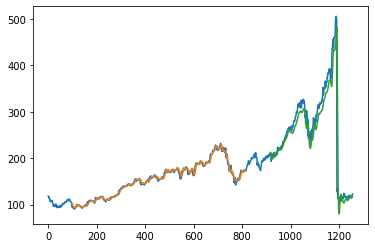

In [53]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan ### Putting all first 0
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df1)-1, :] = test_pred
# plot baseline and predictions
plt.plot(scale.inverse_transform(df1)) ### Inverse Scaling
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

####green part is test data

In [54]:
##### Predicting for future 30 days



In [56]:
len(test_data)

440

In [57]:
 ### len of test_data is 440. if we want to predict 440 index of data we have to take 440-100 index i.e.(340)

x_input=test_data[(len(test_data)-100):].reshape(1,-1)
x_input.shape

(1, 100)

In [58]:
temp_input=list(x_input)

In [59]:
temp_input

[array([0.71651233, 0.72293446, 0.711365  , 0.70948888, 0.72901984,
        0.71595911, 0.71858088, 0.67598316, 0.67377029, 0.69488876,
        0.67990379, 0.69710162, 0.70816597, 0.80505111, 0.83081179,
        0.83781118, 0.8416356 , 0.87858088, 0.85173782, 0.86727601,
        0.83502105, 0.86999399, 0.88923632, 0.88825015, 0.8853638 ,
        0.89455201, 0.89594708, 0.92064943, 0.97929044, 0.99360192,
        0.98366807, 1.        , 0.98544799, 0.9834997 , 0.09308479,
        0.10544799, 0.09876127, 0.07345761, 0.07365003, 0.05407096,
        0.06489477, 0.0556825 , 0.05209862, 0.06016837, 0.06061335,
        0.0524113 , 0.04810583, 0.03968731, 0.04748046, 0.05164161,
        0.04036079, 0.04300661, 0.0527721 , 0.05921828, 0.05712568,
        0.06126278, 0.06361996, 0.05455201, 0.06292243, 0.05488876,
        0.05950692, 0.05924233, 0.06405292, 0.08192423, 0.07398677,
        0.07420325, 0.07304871, 0.06898376, 0.06167168, 0.06535177,
        0.06381239, 0.06111846, 0.0594107 , 0.05

In [60]:
temp_input=temp_input[0].tolist()

In [61]:
temp_input

[0.7165123271196634,
 0.7229344558027659,
 0.7113650030066145,
 0.7094888755261575,
 0.7290198436560433,
 0.7159591100420926,
 0.7185808779314491,
 0.6759831629585087,
 0.673770294648226,
 0.6948887552615755,
 0.6799037883343355,
 0.6971016235718581,
 0.7081659651232712,
 0.8050511124473845,
 0.830811785929044,
 0.8378111846061336,
 0.841635598316296,
 0.8785808779314492,
 0.8517378232110644,
 0.8672760072158752,
 0.8350210463018641,
 0.8699939867708961,
 0.8892363199037885,
 0.8882501503307276,
 0.8853638003607938,
 0.89455201443175,
 0.8959470835838845,
 0.9206494287432352,
 0.9792904389657247,
 0.9936019242333134,
 0.9836680697534577,
 1.0,
 0.9854479855682503,
 0.983499699338545,
 0.09308478653036678,
 0.10544798556825014,
 0.09876127480457003,
 0.07345760673481655,
 0.07365003006614551,
 0.05407095610342749,
 0.06489476849067943,
 0.055682501503307225,
 0.052098616957306054,
 0.0601683704149128,
 0.06061334936861096,
 0.05241130487071555,
 0.04810583283223091,
 0.03968731208659049

In [62]:
lst_output=[]
n_steps=100
i=0
while(i<30): ###30 for 30 days prediction
  if len(temp_input)>100:
    x_input=np.array(temp_input[1:])
    print(f'{i} day input {x_input}')
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    y_hat=model.predict(x_input,verbose=0)
    print(f'{i} day input {y_hat}')
    temp_input.extend(y_hat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(y_hat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    y_hat=model.predict(x_input,verbose=0)
    print(y_hat[0])
    temp_input.extend(y_hat[0].tolist())
    print(len(temp_input))
    lst_output.extend(y_hat.tolist())
    i=i+1


print(lst_output)




[0.06485086]
101
1 day input [0.72293446 0.711365   0.70948888 0.72901984 0.71595911 0.71858088
 0.67598316 0.67377029 0.69488876 0.67990379 0.69710162 0.70816597
 0.80505111 0.83081179 0.83781118 0.8416356  0.87858088 0.85173782
 0.86727601 0.83502105 0.86999399 0.88923632 0.88825015 0.8853638
 0.89455201 0.89594708 0.92064943 0.97929044 0.99360192 0.98366807
 1.         0.98544799 0.9834997  0.09308479 0.10544799 0.09876127
 0.07345761 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862
 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046
 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568
 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692
 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871
 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846 0.0594107
 0.05943476 0.06316296 0.05017438 0.06008419 0.044546   0.04432952
 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948 0.06164762
 0.07011425 0.06944077 0.06956103 0

In [63]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [64]:
len(df1)

1257

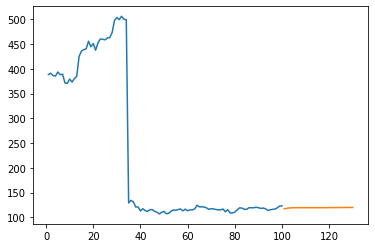

In [65]:
plt.plot(day_new,scale.inverse_transform(df1[1157:]))
plt.plot(day_pred,scale.inverse_transform(lst_output))
####orange line is prediction

In [66]:
df3=df1.tolist()
df3.extend(lst_output)

In [67]:
df3

[[0.06720384846662658],
 [0.067083583884546],
 [0.060805772699939864],
 [0.06212868310282621],
 [0.05493686109440771],
 [0.0532531569452796],
 [0.048466626578472616],
 [0.05051112447384243],
 [0.04483463619963918],
 [0.037739025856885156],
 [0.04086590499098014],
 [0.040625375826818966],
 [0.04394467829224291],
 [0.04254960914010825],
 [0.03963920625375822],
 [0.044257366205652404],
 [0.04084185207456398],
 [0.03588695129284425],
 [0.03610342754058926],
 [0.029753457606734784],
 [0.024918821407095587],
 [0.014696331930246526],
 [0.01592303066746839],
 [0.01969933854479855],
 [0.023138905592303027],
 [0.016957306073361378],
 [0.022080577269993962],
 [0.016331930246542364],
 [0.015201443174984924],
 [0.015514131088394473],
 [0.014335538184004792],
 [0.026650631389055907],
 [0.021888153938665028],
 [0.023211064341551374],
 [0.007408298256163542],
 [0.009019843656043275],
 [0.01683704149128082],
 [0.014648226097414313],
 [0.009957907396271781],
 [0.014455802766085352],
 [0.0150571256764882

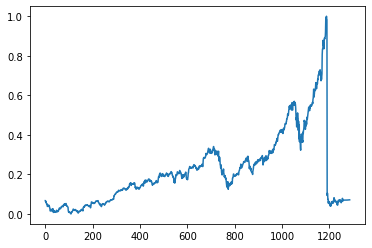

In [68]:
plt.plot(df3)

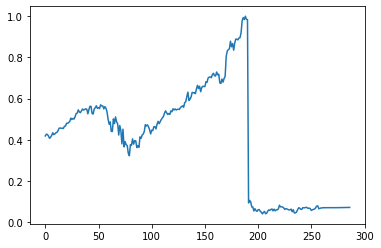

In [69]:
plt.plot(df3[1000:])

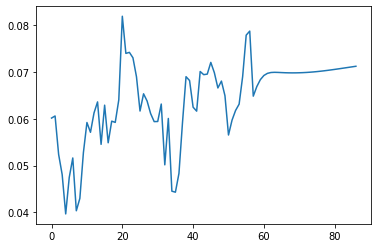

In [70]:
plt.plot(df3[1200:])